In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load functional data
sub = "sub-00003"
session = "ses-1"
datatype = 'func'
task = "task-rest"
run = "run-1"
space = "space-MNI152NLin2009cAsym"
complement = "res-2_desc-preproc_bold.nii.gz"

# Carregue a imagem (4D) [X, Y, Z_slice, tempo]
imagem = './/pilotStudydata//'+sub+'//'+ session +'//'+datatype+'//'+sub+'_'+session+'_'+task+'_'+run+'_'+space+'_'+complement
nii_img = nib.load(imagem)
nii_data = nii_img.get_fdata()

In [4]:
#load anatomical data
sub = "sub-00003"
session = "ses-1"
datatype = 'anat'
#task = "task-rest"
run = "run-1"
space = "space-MNI152NLin2009cAsym"
complement = "res-2_desc-preproc_T1w.nii.gz"
complement_general = "res-2_desc-brain_mask.nii.gz"

# Carregue a imagem (4D) [X, Y, Z_slice, tempo]
anatomic_subj_path = './/pilotStudydata//'+sub+'//'+ session +'//'+datatype+'//'+sub+'_'+session+'_'+run+'_'+space+'_'+complement
brain_mask_path = './/pilotStudydata//'+sub+'//'+ session +'//'+datatype+'//'+sub+'_'+session+'_'+run+'_'+space+'_'+complement_general

anatomical_img = nib.load(anatomic_subj_path)
brain_mask_img = nib.load(brain_mask_path)
anat_data = anatomical_img.get_fdata()
brain_mask_data = brain_mask_img.get_fdata()

In [6]:
diff = anat_data*brain_mask_data
np.mean(diff)
#.\pilotStudydata\sub-00003\ses-1\anat\sub-00003_ses-1_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii

1216.528142726609

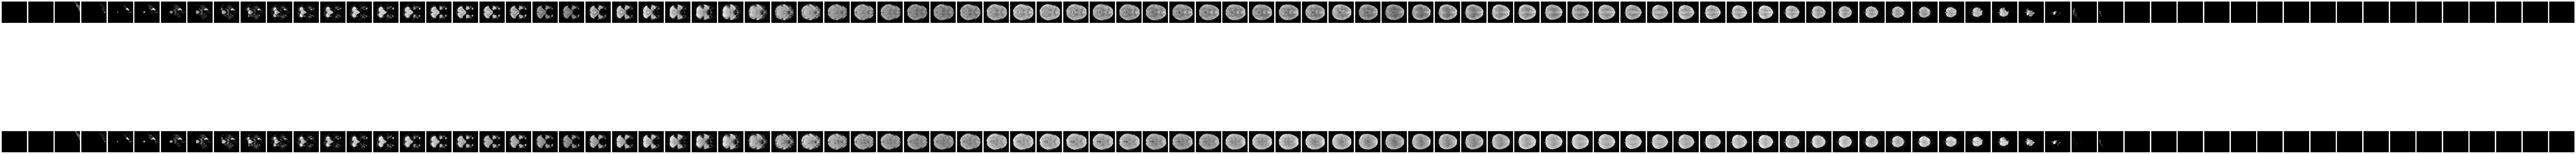

In [3]:
# Exiba algumas fatias da imagem
number_of_frames = 2 # Número de quadros de tempo
number_of_slices = len(nii_data[0,0])  # Número de fatias
# number_of_slices = np.arange(4,-20)

fig, ax = plt.subplots(number_of_frames, number_of_slices, constrained_layout=True)
fig.set_figheight(15)
fig.set_figwidth(150)
# fig.canvas.('Imagem Nifti 4D')
# fig.suptitle('Imagem Nifti 4D - 10 fatias, 30 quadros de tempo', fontsize=16)
for frame in range(number_of_frames):
    for slice in range(number_of_slices):
        ax[frame, slice].imshow(nii_data[:, :, slice, frame], cmap='gray', interpolation=None)
        # ax[frame, slice].set_title(f"Camada {slice} / Quadro {frame}")
        ax[frame, slice].axis('off')


plt.show()

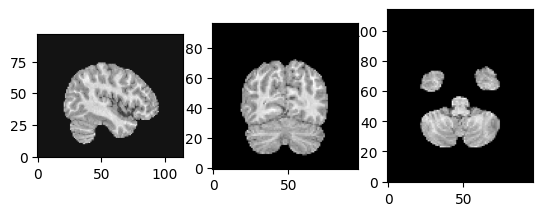

In [7]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = diff[26, :, :]
slice_1 = diff[:, 30, :]
slice_2 = diff[:, :, 16]

show_slices([slice_0, slice_1, slice_2])

In [ ]:
len(nii_data[0,0])